### Отчет по лабораторной работе №4  

**по дисциплине: «Машинное обучение»  
на тему: «Регрессионный анализ данных»  
Вариант №7**  
  
**Выполнил: Брызгалов А.Г 19-ИВТ-2**  

**Цель работы:** получение навыков работы с методами регрессии.  

**Текст задания:**  
  1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
  2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
  3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
  4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
  5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
  6. Заполните пропущенные значения в данных;
  7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

**Используемая регрессия для данного варианта:**  
  2 – линейная регрессия, LASSO регуляризатор;  
  3 – линейная регрессия, RIDGE регуляризатор;  
      
**Набор данных №1**  
*"Продажи домов округа Кинг 05.2014 - 05.2015"*

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('kc_house_data.csv')

**1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).**  
  
  + id - уникальный идентификатор для каждого проданного дома
  + date - дата продажи дома
  + price - цена проданного дома
  + bedrooms - кол-во спален 
  + bathrooms - кол-во ванных комнат, где половина - комната с туалетом, но без душа
  + sqft_living - метраж внутренней жилой площади квартиры
  + sqft_lot - метраж земельного участка
  + floors - этаж
  + waterfront - выходит ли квартира на береговую линию
  + view - оценка собственности от 0 до 4
  + condition - условия в апартаментах от 0 до 5
  + grade - индекс уровня строительства( 1-3 далек от строительства, 7 - средний уровень, 11-13 высококачественный уровень строительства)
  + sqft_above - площадь в квадратных футах внутренней жилплощади, над уровнем земли
  + sqft_basement - площадь в квадратных футах внутренней жилплощади ниже уровня земли
  + yr_built - год постройки
  + yr_renovated - год последней реставрации
  + zipcode - почтовый индекс
  + lat - широта
  + long - долгота
  + sqft_living15 - жилая площадь ближайших 15 соседей
  + sqft_lot15 - общая площадь ближайших 15 соседей

In [98]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции**

In [99]:
print("Размер набора до удаления дубликатов:    ", df.shape)

# Удаление дубликатов
df.dropna()
df.drop_duplicates()


print("Размер набора после удаления дубликатов: ", df.shape)

Размер набора до удаления дубликатов:     (21613, 21)
Размер набора после удаления дубликатов:  (21613, 21)


**4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены**

In [100]:
# Функция для отделения числовых и категориальных признаков
def data_normalize(df):
    numb_columns=[]
    cat_columns=[]
    for column in df.columns:
        # Если тип колоны отличен от object, то заносим его в список числовых признаков
        if df[column].dtype.name!='object': numb_columns.append(column)
            
        # иначе в список категориальных
        else: cat_columns.append(column)
            
    return numb_columns, cat_columns

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [102]:
# Получение списков категориальных и числовых признаков
numb_columns, cat_columns = data_normalize(df)
print("Числовые признаки: ", numb_columns)
print("Категориальные признки: ", cat_columns)

Числовые признаки:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Категориальные признки:  ['date']


In [103]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [104]:
# Замена категориальных признаков
# Производим векторизацию категорильаных признаков при помощи LabelEncoder'a
label_encoder = LabelEncoder()

for column in cat_columns:
    df[column] = pd.Series(label_encoder.fit_transform(df[column]))

In [105]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,220,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,290,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,220,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,283,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,19,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,288,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,52,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,252,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [106]:
# Получение списков категориальных и числовых признаков
numb_columns, cat_columns = data_normalize(df)
print("Числовые признаки: ", numb_columns)
print("Категориальные признки: ", cat_columns)

Числовые признаки:  ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Категориальные признки:  []


**3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)**

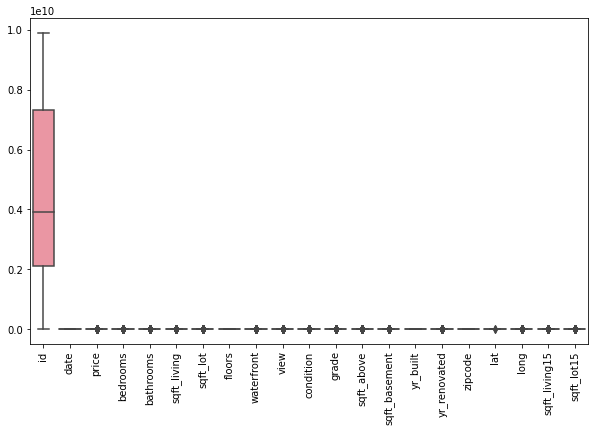

In [107]:
# Диаграмма "ящик с усами" до масштабирования
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=df[numb_columns])
plt.show()

In [108]:
# Масштабирование данны при помощи MinMaxScaler
# Для каждого значения в объектеMinMaxScalerвычитает минимальное значение в объекте и затем делит на диапазон.
# Диапазон - это разница между исходным максимумом и исходным минимумом.
scaler = preprocessing.MinMaxScaler()
df[numb_columns] = scaler.fit_transform(df[numb_columns])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,0.442049,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.592992,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,0.781671,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,0.592992,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,0.762803,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


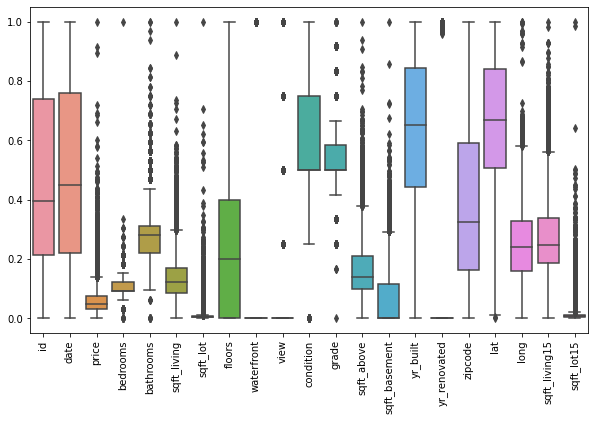

In [109]:
# Диаграмма "ящик с усами" после масштабирования
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(data=df[numb_columns])
plt.show()

**5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других**

<AxesSubplot:>

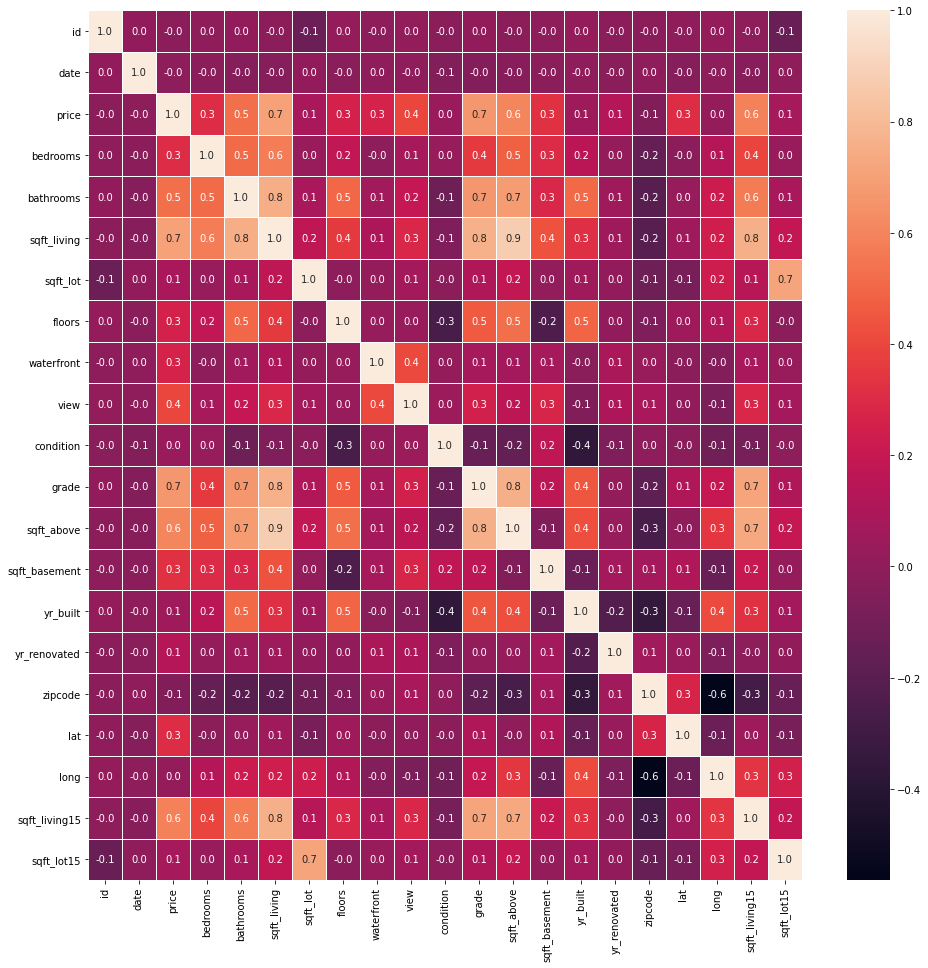

In [110]:
# Положимельный коэф корреляции - прямая зависимость между признаками
# Отрицательный коэф корреляции - обратная зависимость между признаками
# Коэф корреляуии близкий к 0 - признаки не зависимы
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths = .5)

Признаки: **id, waterfount, date, lat, long и zipcode** не коррелируют со остальными признакми и подлежат удалению.

<AxesSubplot:>

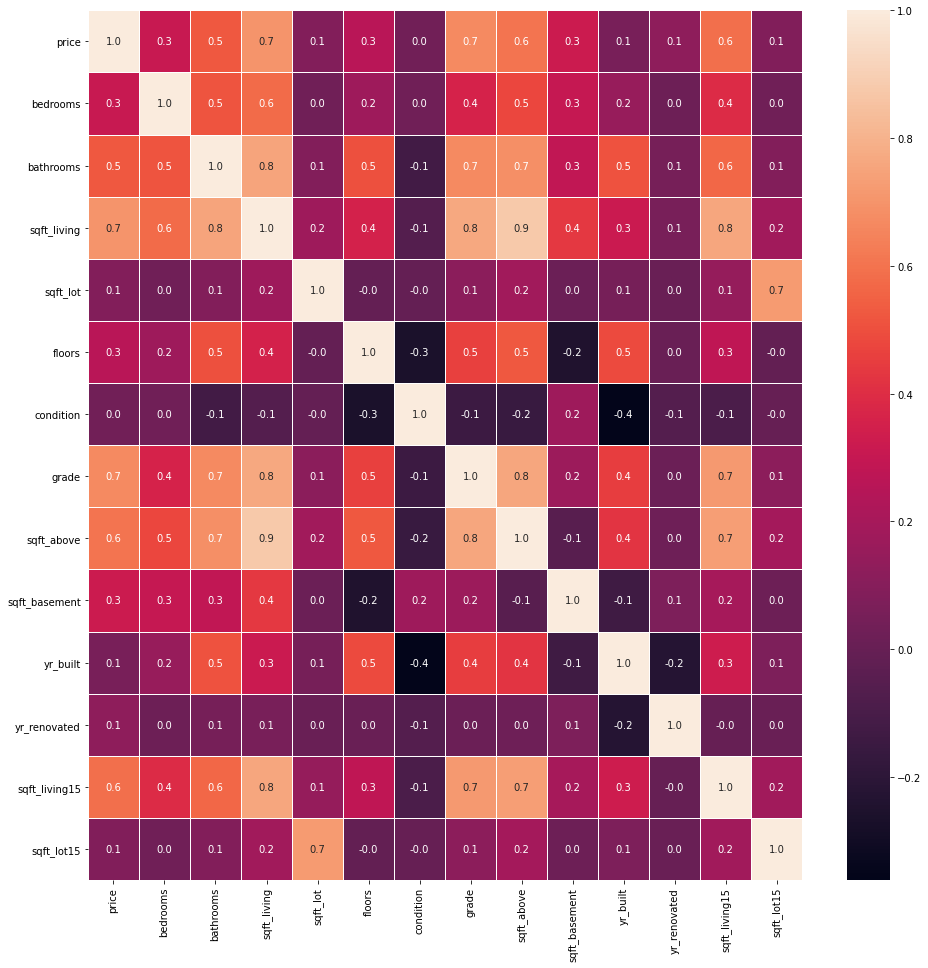

In [111]:
corr_matrix = df.drop(['id', 'date','waterfront','view','zipcode','lat','long'], axis=1).corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt = '.1f', linewidths = .5)

**6. Заполните пропущенные значения в данных**

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  float64
 1   date           21613 non-null  float64
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  float64
 9   view           21613 non-null  float64
 10  condition      21613 non-null  float64
 11  grade          21613 non-null  float64
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  float64
 15  yr_renovated   21613 non-null  float64
 16  zipcode        21613 non-null  float64
 17  lat            21613 non-null  float64
 18  long  

In [113]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

***Пропущенных значений нет***

**7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.**

In [114]:
# 2 – линейная регрессия, LASSO регуляризатор;

# x - признаки   y - ответы
x, y = df.drop(['price','date', 'lat', 'long'], axis=1), df['price']

# Разбиение данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

reg = linear_model.Lasso (alpha = 0.1)
reg.fit (x_train, y_train)

Lasso(alpha=0.1)

In [115]:
# вектор параметров
reg.coef_

array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.])

In [116]:
# предсказываем значения по тестовой x выборке
xt = reg.predict(x_test)
print(xt[:10])

[0.06087655 0.06087655 0.06087655 0.06087655 0.06087655 0.06087655
 0.06087655 0.06087655 0.06087655 0.06087655]


In [117]:
# Вычисление разницы между реальными и предсказанными значениями
print(xt[:10]-y_test[:10])

5506     0.000877
9279     0.016942
16034   -0.031910
6608    -0.059779
20359    0.034122
8798     0.047762
10035   -0.019648
13321    0.034647
15842    0.009729
12119    0.004352
Name: price, dtype: float64


In [123]:
# Вычисление корреляций Пирсона и Спирмена между реальными и 
# предсказанными значениями
P, p_value_P = pearsonr(xt, y_test)
S, p_value_S = spearmanr(xt, y_test)
print("Корреляция Пирсона:  ", P, 'p_value: ', p_value_P)
print("Корреляция Спирмена: ", S, "p_value: ", p_value_S)

Корреляция Пирсона:   0.8143320704572969 p_value:  0.0
Корреляция Спирмена:  0.7754666631938898 p_value:  0.0


In [119]:
# 3 – линейная регрессия, RIDGE регуляризатор

# x - признаки   y - ответы
x, y = df.drop(['price','date', 'lat', 'long'], axis=1), df['price']

# Разбиение данных на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

reg = linear_model.Ridge (alpha = .5)
reg.fit (x_train, y_train)

Ridge(alpha=0.5)

In [120]:
xt = reg.predict(x_test)
print(xt[:10])

[0.07144133 0.04233852 0.10796919 0.14564265 0.04291939 0.03567875
 0.06976329 0.04319195 0.06746656 0.07082564]


In [121]:
print(xt[:10]-y_test[:10])

5506     0.011441
9279    -0.001596
16034    0.015182
6608     0.024987
20359    0.016165
8798     0.022564
10035   -0.010761
13321    0.016962
15842    0.016319
12119    0.014301
Name: price, dtype: float64


In [122]:
# Вычисление корреляций Пирсона и Спирмена между реальными и 
# предсказанными значениями
P, p_value_P = pearsonr(xt, y_test)
S, p_value_S = spearmanr(xt, y_test)
print("Корреляция Пирсона:  ", P, 'p_value: ', p_value_P)
print("Корреляция Спирмена: ", S, "p_value: ", p_value_S)

Корреляция Пирсона:   0.8143320704572969 p_value:  0.0
Корреляция Спирмена:  0.7754666631938898 p_value:  0.0
